In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math


pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)



In [69]:
CSV_PATH = 'liga_mx_2024_2025.csv'
TARGET = 'xg_20s'

In [70]:
df = pd.read_csv(CSV_PATH)
print(f"Datos cargados: {df.shape[0]} corners, {df.shape[1]} caracteristicas")

Datos cargados: 3398 corners, 145 caracteristicas


In [71]:
print("INFORMACIÓN GENERAL")
display(df.head())

INFORMACIÓN GENERAL


,match_id,event_id,team,player,minute,second,period,pass_outcome,pass_height,pass_length,pass_technique,pass_type,body_part,play_pattern,recipient,location_x,location_y,end_location_x,end_location_y,P0_n_defenders_in_18yd_box,P0_n_attackers_in_6yd_box,P0_n_attackers_out_6yd_box,P0_GK_x,P0_GK_y,corner_side,zone_1_name,P0_n_att_zone_1,P0_n_def_zone_1,P0_total_n_zone_1,zone_3_name,P0_n_att_zone_3,P0_n_def_zone_3,P0_total_n_zone_3,zone_4_name,P0_n_att_zone_4,P0_n_def_zone_4,P0_total_n_zone_4,zone_5_name,P0_n_att_zone_5,P0_n_def_zone_5,P0_total_n_zone_5,zone_6_name,P0_n_att_zone_6,P0_n_def_zone_6,P0_total_n_zone_6,zone_7_name,P0_n_att_zone_7,P0_n_def_zone_7,P0_total_n_zone_7,zone_8_name,P0_n_att_zone_8,P0_n_def_zone_8,P0_total_n_zone_8,zone_9_name,P0_n_att_zone_9,P0_n_def_zone_9,P0_total_n_zone_9,zone_10_name,P0_n_att_zone_10,P0_n_def_zone_10,P0_total_n_zone_10,zone_11_name,P0_n_att_zone_11,P0_n_def_zone_11,P0_total_n_zone_11,zone_12_name,P0_n_att_zone_12,P0_n_def_zone_12,P0_total_n_zone_12,zone_13_name,P0_n_att_zone_13,P0_n_def_zone_13,P0_total_n_zone_13,zone_14_name,P0_n_att_zone_14,P0_n_def_zone_14,P0_total_n_zone_14,P0_index_x,game_state,corner_execution_time_raw,corner_execution_time_label,match_date,home_team,away_team,xg_20s,xg_20s_def,goal_20s,goal_20s_def,season,P1_event_id,P1_type,P1_timestamp,P1_index,P1_team,P1_n_defenders_in_18yd_box,P1_n_attackers_in_6yd_box,P1_n_attackers_out_6yd_box,P1_GK_x,P1_GK_y,P1_coordinates_normalized,P1_n_att_zone_1,P1_n_def_zone_1,P1_total_n_zone_1,P1_n_att_zone_3,P1_n_def_zone_3,P1_total_n_zone_3,P1_n_att_zone_4,P1_n_def_zone_4,P1_total_n_zone_4,P1_n_att_zone_5,P1_n_def_zone_5,P1_total_n_zone_5,P1_n_att_zone_6,P1_n_def_zone_6,P1_total_n_zone_6,P1_n_att_zone_7,P1_n_def_zone_7,P1_total_n_zone_7,P1_n_att_zone_8,P1_n_def_zone_8,P1_total_n_zone_8,P1_n_att_zone_9,P1_n_def_zone_9,P1_total_n_zone_9,P1_n_att_zone_10,P1_n_def_zone_10,P1_total_n_zone_10,P1_n_att_zone_11,P1_n_def_zone_11,P1_total_n_zone_11,P1_n_att_zone_12,P1_n_def_zone_12,P1_total_n_zone_12,P1_n_att_zone_13,P1_n_def_zone_13,P1_total_n_zone_13,P1_n_att_zone_14,P1_n_def_zone_14,P1_total_n_zone_14,P0_index_y,M1,M2,M3,M4,M5
0,3939904,bce2ef07-93f3-5e47-950d-c6df200f6db3,Atlético San Luis,Sébastien Antoine Luc Salles Lamonge,47,59,2,NaN,Ground Pass,8.38,Short,Corner,Right Foot,From Corner,Luis Ronaldo Nájera Reyna,120.0,0.1,112.1,2.9,9,2,4,118.2,39.1,Right,Near-post low (6yd),0.0,2.0,2.0,Far-post high (6yd),0.0,0.0,0.0,Near-post channel (outside 6yd),0.0,0.0,0.0,Central corridor (outside 6-yard),0.0,0.0,0.0,Far-post corridor (outside 6yd),2.0,3.0,5.0,Deep central channel (penalty spot depth),1.0,0.0,1.0,Far-post high channel (deep back-post),0.0,0.0,0.0,Penalty-spot corridor,1.0,1.0,2.0,Short return – near,0.0,0.0,0.0,Short return – far,0.0,0.0,0.0,Short return – central,0.0,0.0,0.0,"Far-post low (6yd, mid-height)",0.0,0.0,0.0,Advanced wide return (touchline channel),2.0,1.0,3.0,1900,-1,29.003,20-30 seconds,2024-09-29,Atlético San Luis,Santos Laguna,0.079105,0.0,1.0,0.0,2024/2025,4245dad7-ef08-5178-90bb-78da9767cdf8,Ball Receipt*,48:00,1901.0,Atlético San Luis,8.0,0.0,5.0,114.6,43.0,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0,3.0,2.0,3.0,5.0,0.0,0.0,0.0,2.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,3.0,1900.0,A3,A1,A3,Far-post corridor (outside 6yd),NaN
1,3939904,0b0b6774-3de3-51ca-9d66-bb84c3b7619d,Atlético San Luis,Luis Ronaldo Nájera Reyna,63,53,2,Unknown,High Pass,41.15,Inswinging,Corner,Left Foot,From Corner,NaN,120.0,80.0,111.7,39.7,9,1,4,117.3,39.9,Left,Near-post low (6yd),0.0,1.0,1.0,Far-post high (6yd),0.0,0.0,0.0,Near-post channel (outside 6yd),0.0,0.0,0.0,Central corridor (outside 6-yard),0.0,0.0,0.0,Far-post corridor (outside 6yd),3.0,3.0,6.0,Deep central channel (penalty spot depth),1.0,2.0,3.0,Far-post high channel (deep back-post),0.0,0.0,0.0,Penalty-spot corridor,0.0,0.0,0.0,Short return – near,0.0,1.0,1.0,Short return – far,0.0,0.0,0.0,Short return – central,0.0,0.0,0.0,"Far-post low

In [72]:
print("\nTIPOS DE DATOS")
print(df.dtypes.value_counts())


TIPOS DE DATOS
float64    97
object     39
int64       9
Name: count, dtype: int64


In [73]:
print("VALORES NULOS (%)")
print((df.isna().mean() * 100).sort_values(ascending=False).head(50))

VALORES NULOS (%)
M5                    87.904650
M4                    82.577987
M3                    72.307240
M2                    54.914656
pass_outcome          49.558564
recipient             41.318423
P0_n_att_zone_1       35.638611
P0_n_def_zone_1       35.638611
P0_total_n_zone_1     35.638611
zone_3_name           35.638611
P0_n_att_zone_3       35.638611
P0_GK_x               35.638611
P0_GK_y               35.638611
zone_5_name           35.638611
P0_n_att_zone_5       35.638611
P0_total_n_zone_3     35.638611
P0_n_def_zone_3       35.638611
zone_12_name          35.638611
P0_n_att_zone_12      35.638611
P0_n_def_zone_12      35.638611
P0_total_n_zone_12    35.638611
zone_13_name          35.638611
P0_n_att_zone_13      35.638611
P0_n_def_zone_9       35.638611
P0_total_n_zone_9     35.638611
zone_10_name          35.638611
P0_n_att_zone_10      35.638611
P0_n_def_zone_10      35.638611
P0_total_n_zone_10    35.638611
zone_11_name          35.638611
P0_n_att_zone_11      

In [74]:
print("\n=== VALORES ÚNICOS POR COLUMNA ===")

# Conteo de valores únicos
unique_counts = df.nunique(dropna=False).sort_values(ascending=True).to_frame("valores_unicos")

# Mostrar top y resumen general
display(unique_counts)

print(f"\nTotal columnas: {len(unique_counts)}")
print(f"Columnas con 1 solo valor (constantes): {sum(unique_counts['valores_unicos'] == 1)}")
print(f"Columnas binarias (2 valores): {sum(unique_counts['valores_unicos'] == 2)}")
print(f"Columnas con más de 100 categorías: {sum(unique_counts['valores_unicos'] > 100)}")



=== VALORES ÚNICOS POR COLUMNA ===


,valores_unicos
play_pattern,1
pass_type,1
season,1
period,2
location_x,2
corner_side,2
zone_3_name,2
body_part,2
zone_8_name,2
zone_9_name,2



Total columnas: 145
Columnas con 1 solo valor (constantes): 3
Columnas binarias (2 valores): 19
Columnas con más de 100 categorías: 18


In [75]:
cat_cols = [c for c in df.columns if df[c].dtype == "object" and c != TARGET]
num_cols = [c for c in df.columns if np.issubdtype(df[c].dtype, np.number) and c != TARGET]

print(f"\nColumnas numéricas: {len(num_cols)}")
print(f"Columnas categóricas: {len(cat_cols)}")


Columnas numéricas: 105
Columnas categóricas: 39


## Numerical variable analysis


=== NUMERICAL STATISTICS ===


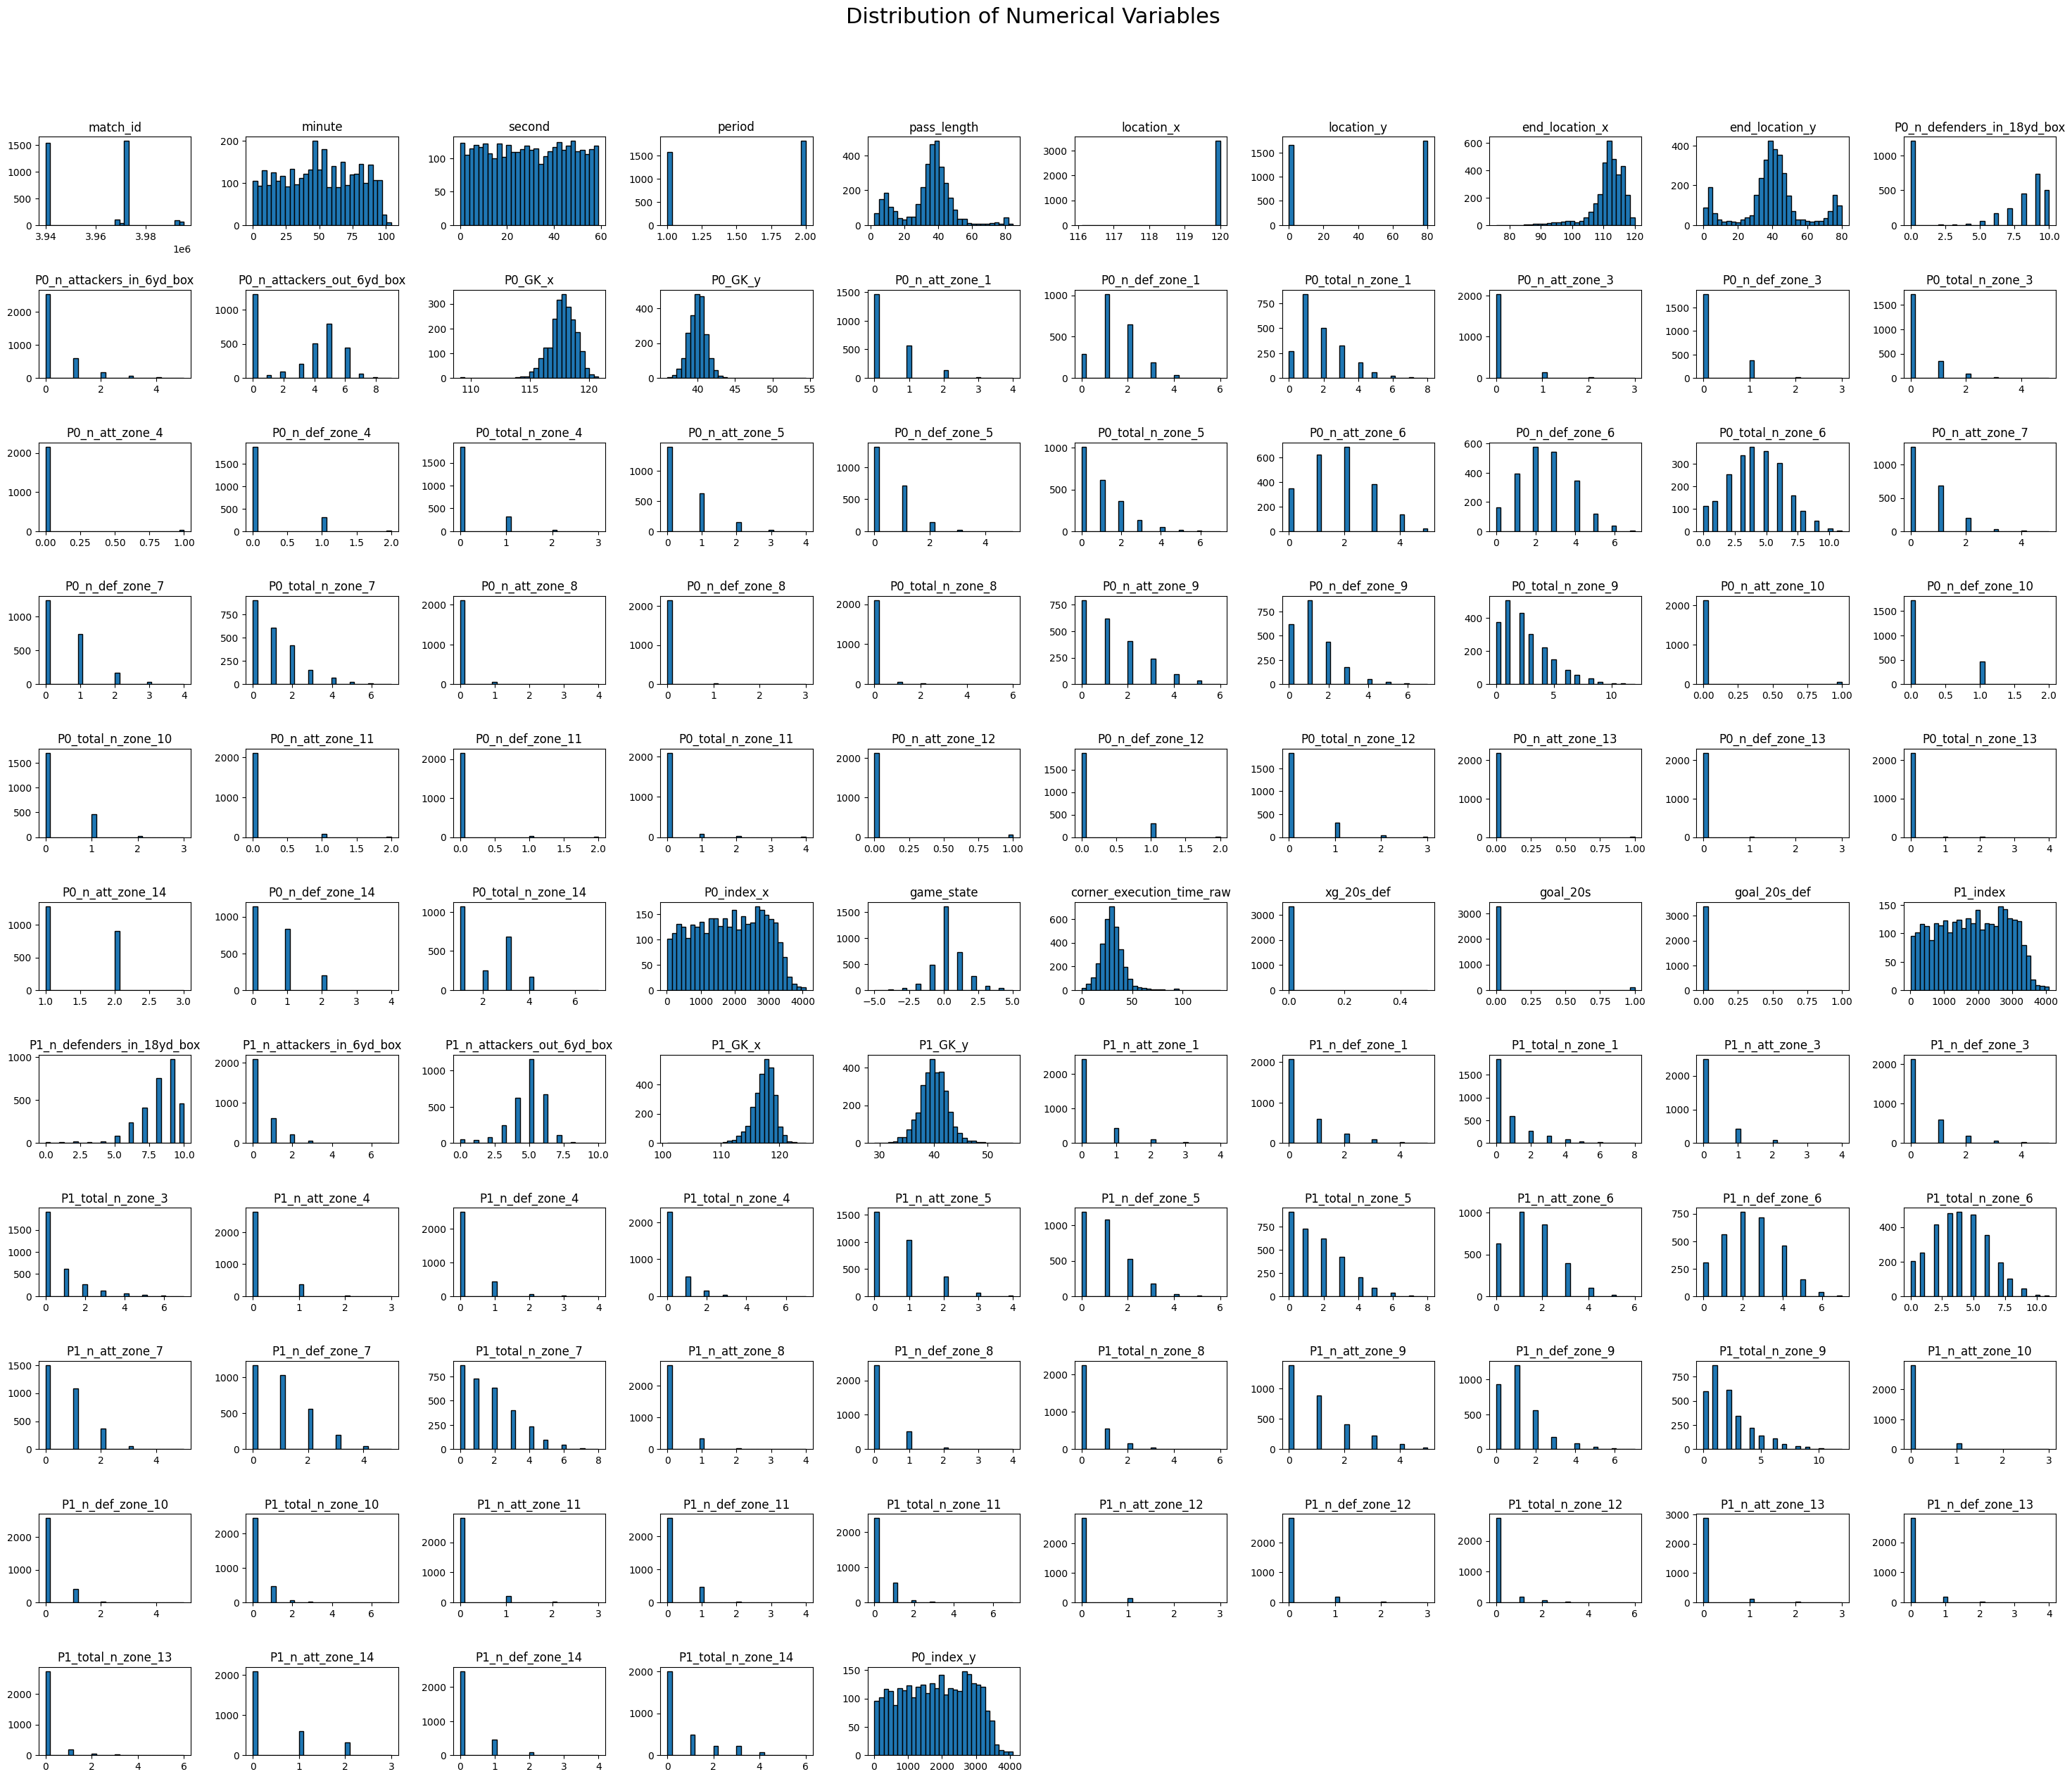

In [76]:
print("\n=== NUMERICAL STATISTICS ===")
# display(df[num_cols].describe().T)

# Basic distributions
axes = df[num_cols].hist(
    figsize=(30, 25),   # Overall figure size
    bins=30,            # Number of bins per histogram
    edgecolor='black',  # Clear bar borders
    grid=False          # Optional: turn off background grid
)

# Add global title
plt.suptitle("Distribution of Numerical Variables", fontsize=22, y=1.02)

# Add spacing between plots (key part!)
plt.tight_layout(pad=3.0, w_pad=2.0, h_pad=2.0)
# pad → space around figure
# w_pad → horizontal space between subplots
# h_pad → vertical space between subplots

plt.show()



=== CORRELATION WITH TARGET VARIABLE ===


,correlation_with_target
goal_20s,0.438599
P1_n_att_zone_6,0.067675
P1_n_attackers_out_6yd_box,0.056129
P1_n_att_zone_1,0.052752
P1_n_att_zone_3,0.047997
P0_n_att_zone_12,0.047900
P1_total_n_zone_4,0.040542
P1_total_n_zone_6,0.038371
P1_n_def_zone_4,0.037085
P1_GK_x,0.034786


C:\Users\laura\AppData\Local\Temp\ipykernel_28520\3322057695.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


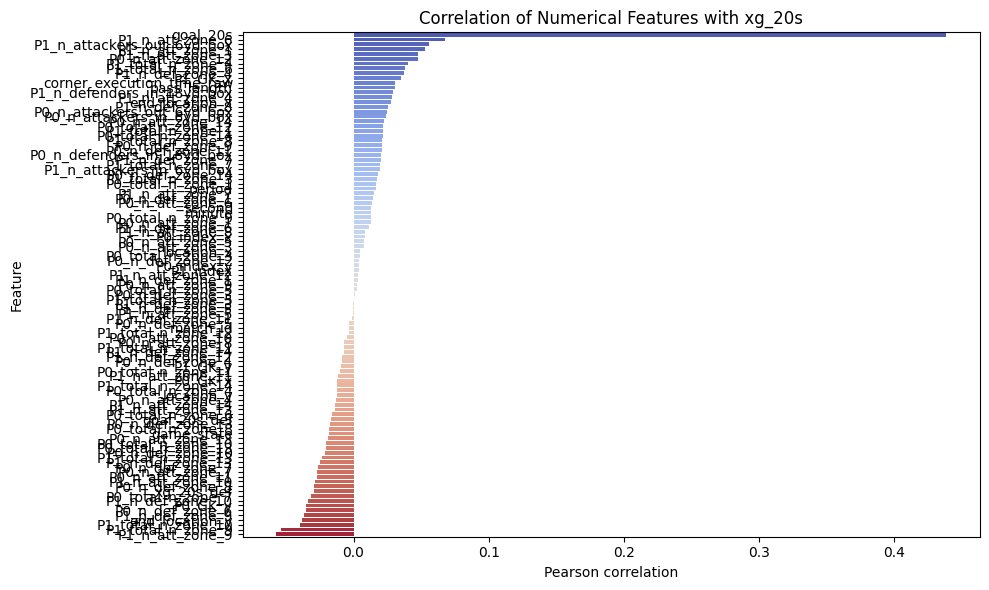

In [77]:
print("\n=== CORRELATION WITH TARGET VARIABLE ===")

# Filter only numeric columns
num_cols = df.select_dtypes(include=["number"]).columns.tolist()

# Compute correlation matrix
corr_matrix = df[num_cols].corr()

# Select correlations with target
if TARGET not in corr_matrix.columns:
    raise ValueError(f"The column '{TARGET}' is not numerical or not found in correlation matrix.")

target_corr = corr_matrix[TARGET].drop(TARGET).sort_values(ascending=False)

# Display as table
display(target_corr.to_frame("correlation_with_target"))

# Plot as bar chart
plt.figure(figsize=(10,6))
sns.barplot(
    x=target_corr.values,
    y=target_corr.index,
    palette="coolwarm"
)
plt.title(f"Correlation of Numerical Features with {TARGET}")
plt.xlabel("Pearson correlation")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


In [78]:
# Compute Spearman correlations only for numeric columns
num_cols = df.select_dtypes(include=["number"]).columns

# Make sure target is numeric
if TARGET not in num_cols:
    raise ValueError(f"Target '{TARGET}' is not numeric. Encode it first.")

# Get correlations with the target and sort them
spearman_corr = df[num_cols].corr(method='spearman')[TARGET].sort_values(ascending=False)

# Display nicely
display(spearman_corr.to_frame("Spearman_correlation"))


,Spearman_correlation
xg_20s,1.000000
goal_20s,0.302247
P1_total_n_zone_6,0.127653
P1_n_att_zone_6,0.126159
pass_length,0.114809
P1_n_def_zone_6,0.104200
P1_GK_x,0.091246
P1_n_attackers_out_6yd_box,0.082878
P1_n_defenders_in_18yd_box,0.061471
P1_total_n_zone_7,0.048829


## Categorical Varible Anlysis


=== CATEGORICAL VARIABLES ===


,unique_values
pass_type,1
play_pattern,1
season,1
zone_4_name,2
zone_3_name,2
zone_1_name,2
corner_side,2
body_part,2
zone_6_name,2
zone_13_name,2


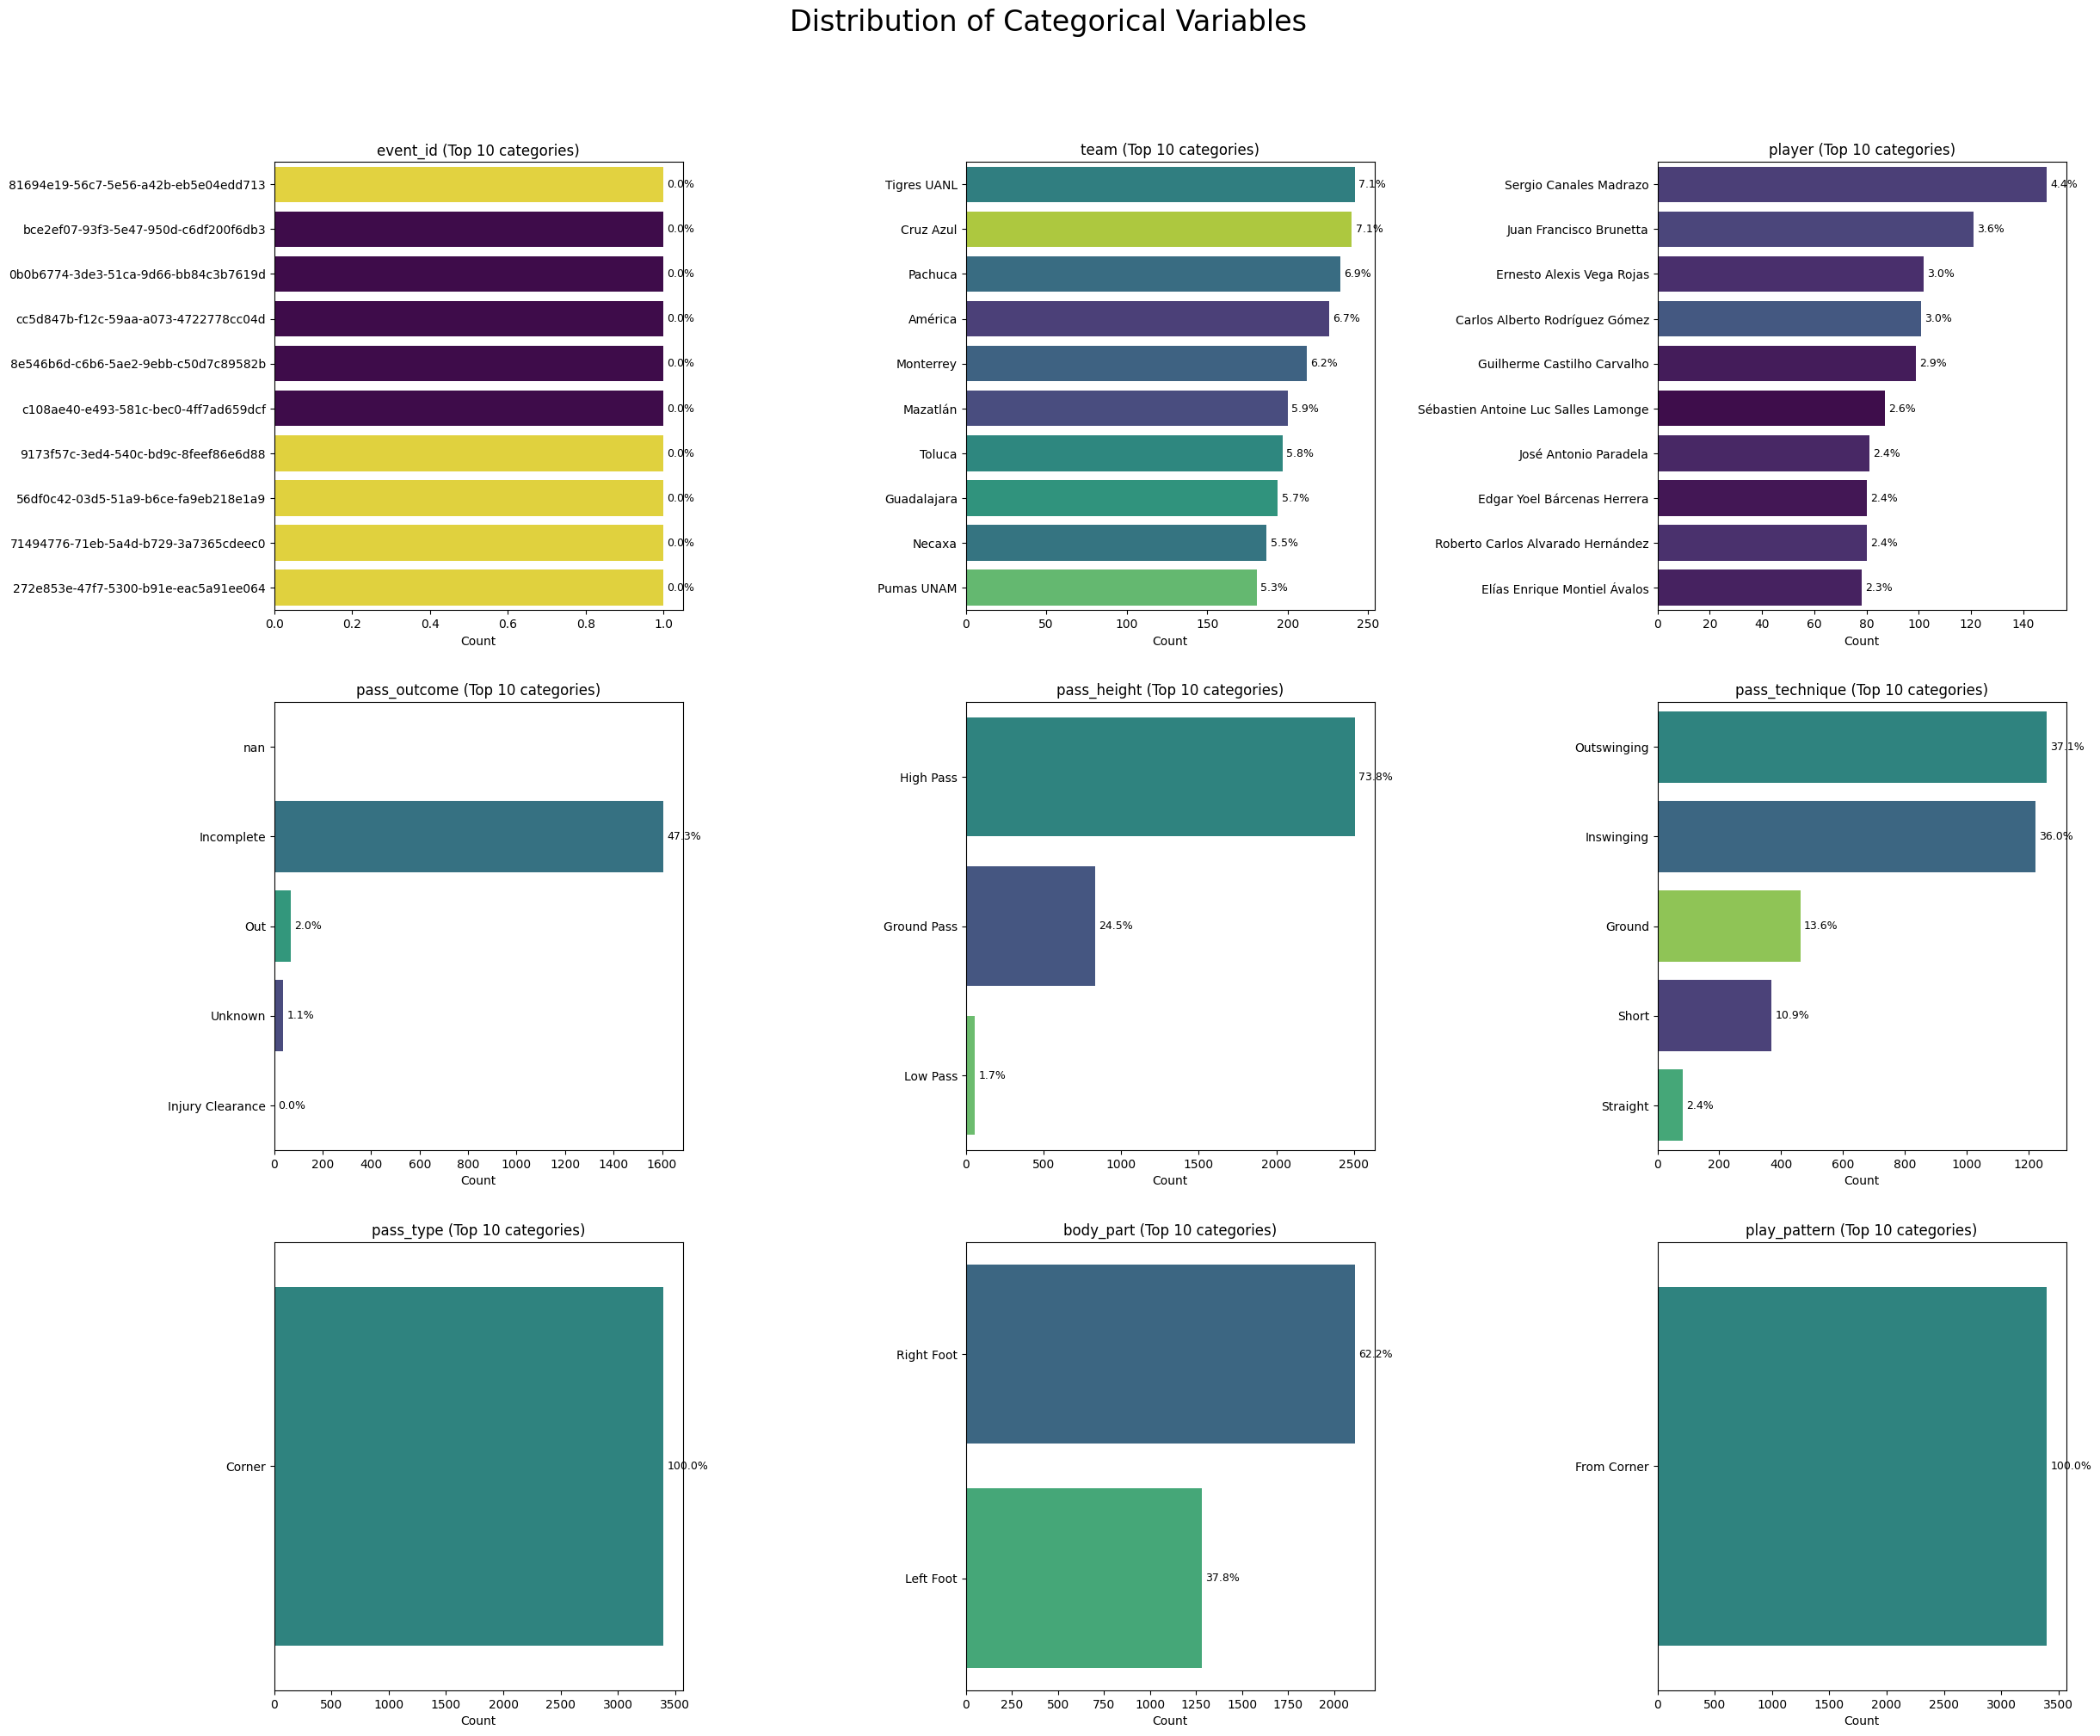

In [79]:
print("\n=== CATEGORICAL VARIABLES ===")

# Make sure we have categorical columns
if len(cat_cols) == 0:
    print("No categorical variables detected.")
else:
    # Count unique values per categorical variable
    cat_summary = (
        df[cat_cols]
        .nunique(dropna=False)
        .sort_values(ascending=True)
        .to_frame("unique_values")
    )
    display(cat_summary)

    # Plot top categories (only for columns with few unique values)
    n_to_plot = min(9, len(cat_cols))  # limit to max 9 plots
    fig, axes = plt.subplots(
        math.ceil(n_to_plot / 3), 3, figsize=(25, 20)
    )

    axes = axes.flatten()

    for i, col in enumerate(cat_cols[:n_to_plot]):
        order = (
            df[col].value_counts(dropna=False)
            .head(10)
            .index
        )
        sns.countplot(
            data=df,
            y=col,
            order=order,
            hue=col,          # usa la misma variable para colorear
            palette="viridis",
            legend=False,     # evita la leyenda redundante
            ax=axes[i]
        )

        axes[i].set_title(f"{col} (Top 10 categories)")
        axes[i].set_xlabel("Count")
        axes[i].set_ylabel(None)

        # Add percentage labels next to bars
        total = len(df[col])
        for container in axes[i].containers:
            axes[i].bar_label(
                container,
                labels=[f"{(v.get_width()/total*100):.1f}%" for v in container],
                fontsize=9,
                padding=3
            )

    # Adjust spacing
    plt.suptitle("Distribution of Categorical Variables", fontsize=24, y=1.02)
    plt.tight_layout(pad=3, w_pad=3, h_pad=3)
    plt.show()


## Target variable analysis


=== TARGET VARIABLE ANALYSIS ===
count    3398.000000
mean        0.034579
std         0.093803
min         0.000000
25%         0.000000
50%         0.000000
75%         0.035138
max         1.258607
Name: xg_20s, dtype: float64


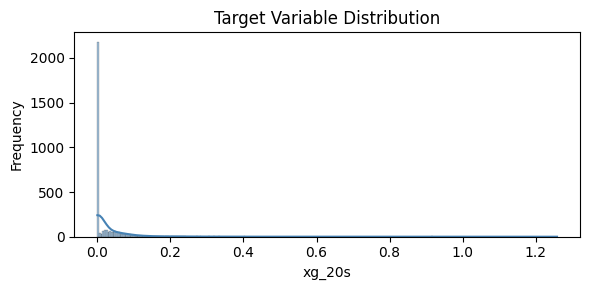

In [80]:
if TARGET not in df.columns:
    raise ValueError(f"The column '{TARGET}' is not present in the dataset.")

y = df[TARGET]

print("\n=== TARGET VARIABLE ANALYSIS ===")

if y.dtype == "object" or y.nunique() < 20:
    display(
        y.value_counts()
        .to_frame("count")
        .assign(pct=lambda x: round(x["count"] / len(y) * 100, 2))
    )

else:
    print(y.describe())

    plt.figure(figsize=(6, 3))
    sns.histplot(y, kde=True, color="steelblue")
    plt.title("Target Variable Distribution")
    plt.xlabel(TARGET)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()



=== TARGET VARIABLE ANALYSIS ===
count    1222.000000
mean        0.096154
std         0.136216
min         0.004564
25%         0.030276
50%         0.054534
75%         0.096960
max         1.258607
Name: xg_20s, dtype: float64


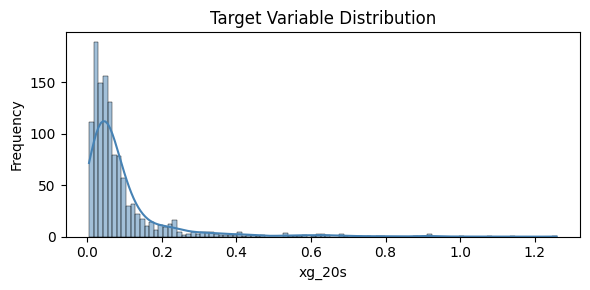

In [81]:

if TARGET not in df.columns:
    raise ValueError(f"The column '{TARGET}' is not present in the dataset.")

y = df[df[TARGET] > 0][TARGET]

print("\n=== TARGET VARIABLE ANALYSIS ===")

if y.dtype == "object" or y.nunique() < 20:
    display(
        y.value_counts()
        .to_frame("count")
        .assign(pct=lambda x: round(x["count"] / len(y) * 100, 2))
    )

else:
    print(y.describe())

    plt.figure(figsize=(6, 3))
    sns.histplot(y, kde=True, color="steelblue")
    plt.title("Target Variable Distribution")
    plt.xlabel(TARGET)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()


In [83]:
df_general = df.copy()

C:\Users\laura\AppData\Local\Temp\ipykernel_28520\687804246.py:97: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap_obj = cm.get_cmap(cmap)


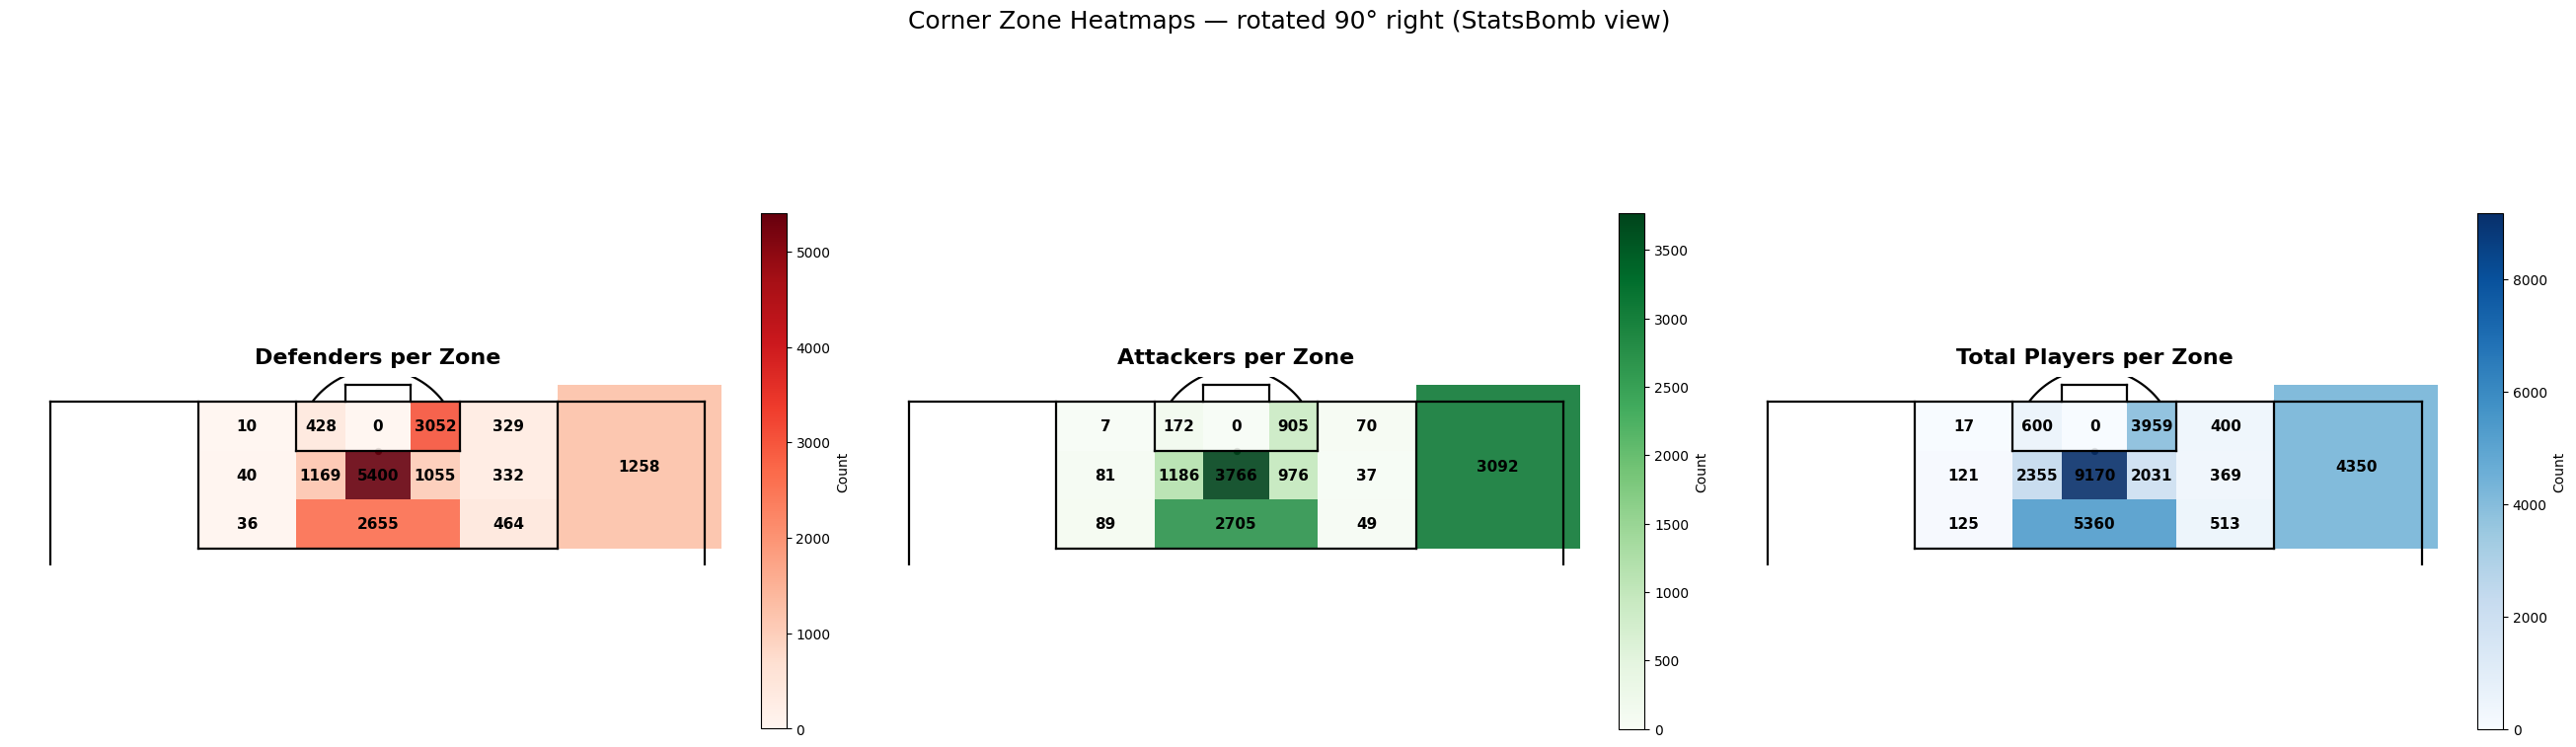

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, Arc
from matplotlib.colors import Normalize
import matplotlib.cm as cm

# ==== helper: rotación 90° a la derecha (clockwise) ====
# en el pitch StatsBomb (x:0-120, y:0-80) rotamos con: x' = 80 - y, y' = x
def rot90_right(x, y):
    return 80 - y, x

# ====== CANCHA (blanca, líneas negras) — versión rotada ======
def draw_pitch_rotated(ax, line_color="black", lw=1.6):
    ax.set_facecolor("white")
    # Función para trazar segmentos rotando sus puntos
    def seg(p1, p2):
        x1,y1 = rot90_right(*p1)
        x2,y2 = rot90_right(*p2)
        ax.plot([x1,x2],[y1,y2], color=line_color, lw=lw)

    # Bordes
    seg((0,0),(0,80)); seg((0,80),(120,80))
    seg((120,80),(120,0)); seg((120,0),(0,0))
    # Línea media
    seg((60,0),(60,80))
    # Área penal derecha (x=102..120,y=18..62)
    seg((120,18),(102,18)); seg((102,18),(102,62)); seg((102,62),(120,62))
    # Área chica
    seg((120,30),(114,30)); seg((114,30),(114,50)); seg((114,50),(120,50))
    # Portería
    seg((120,36),(122,36)); seg((122,36),(122,44)); seg((122,44),(120,44))
    # Punto penal + arco
    px, py = rot90_right(114, 40)
    ax.scatter(px, py, color=line_color, s=18)
    # Arco (dibujamos con muchos segs para simplificar rotación)
    theta = np.linspace(np.deg2rad(308), np.deg2rad(52)+2*np.pi, 60)
    arc_x = 114 + 10*np.cos(theta)
    arc_y = 40 + 10*np.sin(theta)
    ax.plot(*rot90_right(arc_x, arc_y), color=line_color, lw=lw)

    # Límites tras la rotación: eje X ≈ (80 →  -5) y eje Y ≈ (100 → 123)
    ax.set_xlim(-5, 85)     # x' (antes era y)
    ax.set_ylim(100, 123)   # y' (antes era x)
    ax.set_aspect("equal")
    ax.axis("off")

# ==== zonas base (las que me diste) ====
base_zones = [
    (114, 120, 30, 36, "Near-post low (6yd)"),
    (114, 120, 36, 44, "Central (6yd/GK)"),
    (114, 120, 44, 50, "Far-post high (6yd)"),
    (108, 114, 18, 30, "Near-post channel (outside 6yd)"),
    (108, 114, 30, 36, "Central corridor (outside 6-yard)"),
    (108, 114, 36, 44, "Far-post corridor (outside 6yd)"),
    (108, 114, 44, 50, "Deep central channel (penalty spot depth)"),
    (108, 114, 50, 62, "Far-post high channel (deep back-post)"),
    (102, 108, 30, 50, "Penalty-spot corridor"),
    (102, 108, 18, 30, "Short return – near"),
    (102, 108, 50, 62, "Short return – far"),
    (114, 120, 18, 30, "Short return – central"),
    (114, 120, 50, 62, "Far-post low (6yd, mid-height)"),
    (102, 122, -2, 18, "Advanced wide return (touchline channel)"),
]

# ====== consolidado de zonas (usa tu df real con zone_*_name + P0_n_*_zone_*) ======
# zones_df debe quedar con columnas: zone_name, att, def, total
# (dejo el bloque de consolidación por si aún no lo tenías)
zone_name_cols = [c for c in df_general.columns if c.endswith("_name")]
rows = []
for zcol in zone_name_cols:
    num = zcol.split("_")[1]
    name_col = zcol
    att_col  = f"P0_n_att_zone_{num}"
    def_col  = f"P0_n_def_zone_{num}"
    tot_col  = f"P0_total_n_zone_{num}"
    if all(c in df_general.columns for c in [name_col, att_col, def_col, tot_col]):
        tmp = df_general[[name_col, att_col, def_col, tot_col]].copy()
        tmp.columns = ["zone_name", "att", "def", "total"]
        rows.append(tmp)

zones_df = (pd.concat(rows, ignore_index=True)
              .groupby("zone_name", as_index=False).sum())

# asegurar todas las zonas aunque no aparezcan
all_zone_names = [z[4] for z in base_zones]
zones_df = zones_df.set_index("zone_name").reindex(all_zone_names).fillna(0).reset_index()

# ====== función para un panel rotado, colorbars y fondo blanco ======
def draw_zone_heat_rotated(ax, metric, title, cmap):
    draw_pitch_rotated(ax, line_color="black", lw=1.6)
    ax.set_title(title, fontsize=16, fontweight="bold", y=1.03, color="black")

    vals = zones_df[metric].to_numpy()
    vmax = max(float(np.nanmax(vals)), 1.0)
    norm = Normalize(vmin=0, vmax=vmax)
    cmap_obj = cm.get_cmap(cmap)

    # pintar cada zona (rotando cada rectángulo)
    for (xmin, xmax, ymin, ymax, name) in base_zones:
        v = float(zones_df.loc[zones_df["zone_name"] == name, metric].values[0]) if name in zones_df["zone_name"].values else 0.0
        color = cmap_obj(norm(v))

        # rotamos los 4 vértices y construimos el rectángulo a mano (como polígono)
        xs = np.array([xmin, xmax, xmax, xmin])
        ys = np.array([ymin, ymin, ymax, ymax])
        xr, yr = rot90_right(xs, ys)
        ax.fill(xr, yr, color=color, alpha=0.9, edgecolor=None)

        # etiqueta con el conteo (usar centro rotado)
        cx, cy = rot90_right((xmin+xmax)/2.0, (ymin+ymax)/2.0)
        ax.text(cx, cy, f"{int(v)}", ha="center", va="center",
                fontsize=11, color="black", fontweight="bold")

    # colorbar por panel
    sm = cm.ScalarMappable(norm=norm, cmap=cmap_obj)
    cb = plt.colorbar(sm, ax=ax, fraction=0.035, pad=0.02)
    cb.set_label("Count", rotation=90, color="black")
    cb.ax.yaxis.set_tick_params(color="black")
    plt.setp(cb.ax.get_yticklabels(), color="black")

# ====== figura apaisada y más grande ======
fig, axes = plt.subplots(1, 3, figsize=(26, 9), constrained_layout=True)

draw_zone_heat_rotated(axes[0], "def",   "Defenders per Zone", cmap="Reds")   # rojita
draw_zone_heat_rotated(axes[1], "att",   "Attackers per Zone", cmap="Greens") # verde
draw_zone_heat_rotated(axes[2], "total", "Total Players per Zone", cmap="Blues") # azul

plt.suptitle("Corner Zone Heatmaps — rotated 90° right (StatsBomb view)", fontsize=18, y=1.02)
plt.show()


C:\Users\laura\AppData\Local\Temp\ipykernel_28520\996023123.py:92: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap_obj = cm.get_cmap(cmap)


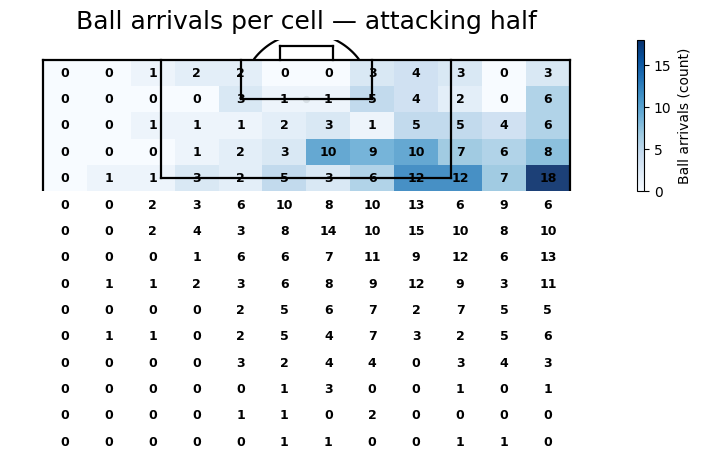

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, Arc
from matplotlib.colors import Normalize
import matplotlib.cm as cm

# ======================================================
# Pitch helpers (StatsBomb 120x80) + rotation 90° right
# ======================================================
def rot90_right(x, y):
    """Rotate 90° clockwise in SB pitch: (x', y') = (80 - y, x)."""
    return 80 - np.asarray(y), np.asarray(x)

def draw_pitch_rotated(ax, line_color="black", lw=1.6):
    """White pitch, black lines, but drawn rotated 90° right."""
    ax.set_facecolor("white")

    def seg(p1, p2):
        x1, y1 = rot90_right(*p1)
        x2, y2 = rot90_right(*p2)
        ax.plot([x1, x2], [y1, y2], color=line_color, lw=lw)

    # Outline & halfway
    seg((0, 0), (0, 80)); seg((0, 80), (120, 80))
    seg((120, 80), (120, 0)); seg((120, 0), (0, 0))
    seg((60, 0), (60, 80))

    # Right penalty area, 6yd box, goal
    seg((120, 18), (102, 18)); seg((102, 18), (102, 62)); seg((102, 62), (120, 62))
    seg((120, 30), (114, 30)); seg((114, 30), (114, 50)); seg((114, 50), (120, 50))
    seg((120, 36), (122, 36)); seg((122, 36), (122, 44)); seg((122, 44), (120, 44))

    # Penalty spot + arc
    px, py = rot90_right(114, 40)
    ax.scatter(px, py, color=line_color, s=18)
    theta = np.linspace(np.deg2rad(308), np.deg2rad(52) + 2*np.pi, 60)
    arc_x = 114 + 10*np.cos(theta); arc_y = 40 + 10*np.sin(theta)
    ax.plot(*rot90_right(arc_x, arc_y), color=line_color, lw=lw)

    # View limits (after rotation)
    ax.set_xlim(-5, 85)
    ax.set_ylim(100, 123)
    ax.set_aspect("equal"); ax.axis("off")

# ======================================================
# Grid heatmap over HALF PITCH
# ======================================================
def half_pitch_grid_heatmap(
    balls_df: pd.DataFrame,
    x_col="x", y_col="y",
    half="attacking",   # "attacking" (x∈[60,120]) or "defending" (x∈[0,60])
    nx=12, ny=8,        # number of grid cells horizontally (x) and vertically (y)
    rotate=True,
    cmap="Blues",
    title="Ball arrivals per cell (half pitch)"
):
    """
    Build a square-grid heatmap over half pitch using ball arrival locations.
    """
    # 1) Filter half-pitch bounds
    if half == "attacking":
        x_min, x_max = 60.0, 120.0
    else:
        x_min, x_max = 0.0, 60.0
    y_min, y_max = 0.0, 80.0

    df = balls_df[[x_col, y_col]].dropna().copy()
    df = df[(df[x_col] >= x_min) & (df[x_col] <= x_max) &
            (df[y_col] >= y_min) & (df[y_col] <= y_max)]

    # 2) Build grid edges
    x_edges = np.linspace(x_min, x_max, nx + 1)
    y_edges = np.linspace(y_min, y_max, ny + 1)

    # 3) 2D histogram counts
    H, _, _ = np.histogram2d(df[y_col], df[x_col], bins=[y_edges, x_edges])  # H[yi, xi]
    # Note: we pass (y, x) to histogram2d to match [rows, cols] indexing

    # 4) Plot
    fig, ax = plt.subplots(1, 1, figsize=(18, 8), constrained_layout=True)

    if rotate:
        draw_pitch_rotated(ax)
    else:
        # Si quisieras la versión sin rotar, harías otra función draw_pitch() clásica
        draw_pitch_rotated(ax)  # mantenemos rotado como estándar visual

    # Normalize colors
    vmax = max(1, H.max())
    norm = Normalize(vmin=0, vmax=vmax)
    cmap_obj = cm.get_cmap(cmap)

    # 5) Draw each grid cell as a filled polygon
    for ix in range(nx):
        for iy in range(ny):
            # cell bounds in SB coordinates
            xmin, xmax = x_edges[ix], x_edges[ix+1]
            ymin, ymax = y_edges[iy], y_edges[iy+1]
            val = H[iy, ix]

            # color by count
            color = cmap_obj(norm(val))

            if rotate:
                xs = np.array([xmin, xmax, xmax, xmin])
                ys = np.array([ymin, ymin, ymax, ymax])
                xr, yr = rot90_right(xs, ys)
                ax.fill(xr, yr, color=color, alpha=0.92, edgecolor=None)

                # annotate count at cell center
                cx, cy = rot90_right((xmin + xmax) / 2, (ymin + ymax) / 2)
                ax.text(cx, cy, int(val), ha="center", va="center",
                        fontsize=9, color="black", fontweight="bold")
            else:
                # (no-rotate branch, no usada aquí)
                rect = Rectangle((xmin, ymin), xmax - xmin, ymax - ymin,
                                 color=color, alpha=0.92, ec=None)
                ax.add_patch(rect)
                ax.text((xmin + xmax) / 2, (ymin + ymax) / 2, int(val),
                        ha="center", va="center", fontsize=9, color="black", fontweight="bold")

    # Colorbar
    sm = cm.ScalarMappable(norm=norm, cmap=cmap_obj)
    cb = plt.colorbar(sm, ax=ax, fraction=0.035, pad=0.02)
    cb.set_label("Ball arrivals (count)")

    ax.set_title(title, fontsize=18, y=1.02)
    plt.show()

# ============================
# EXAMPLE USAGE
# ============================
# 1) Replace this with your real data (must contain x,y in SB coords)
# For demo, simulate some arrivals biased to the right wing:
np.random.seed(7)
balls_df = df_general[""]

# 2) Plot heatmap over attacking half
#   - Choose color: Reds / Greens / Blues (you asked “azul para unión”, pero aquí solo es 1 capa)
half_pitch_grid_heatmap(
    balls_df,
    x_col="x", y_col="y",
    half="attacking",
    nx=15, ny=12,        # más celdas = cuadritos más chiquitos
    rotate=True,
    cmap="Blues",
    title="Ball arrivals per cell — attacking half"
)
